In [1]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping  
import glob as gb 
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

2024-05-17 11:07:09.869469: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-17 11:07:10.437703: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
IMG_SIZE = 224
SEED = 1000
BATCH_SIZE = 16
TRAIN_DIR = '/mnt/g/food-101.zip/Training_data'
TEST_DIR = '/mnt/g/food-101.zip/Test_data'

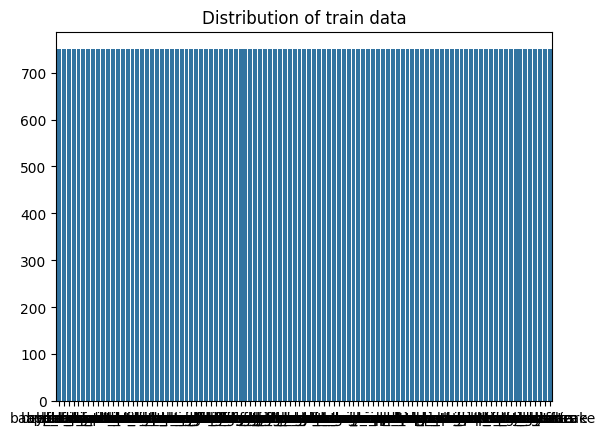

75750


In [3]:
categories = []
class_count=[]
train_exm = 0
for f in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname=str(TRAIN_DIR + '/' + f + '/*.jpg'))
    categories.append(f)
    class_count.append(len(files))
    train_exm += len(files)

sns.barplot(x=categories, y=class_count).set_title("Distribution of train data")

plt.show()
print(train_exm)

In [4]:
# def preprocess_input(img):
#     img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
#     img = tf.keras.applications.efficientnet.preprocess_input(img)
#     return img

train_gen = ImageDataGenerator(
   rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    shear_range=0.1,
    validation_split=0.2,
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
    #dtype=tf.float32

)

test_gen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
    #dtype=tf.float32
)

In [5]:
train_batch = train_gen.flow_from_directory(
    directory = TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset = 'training',
    seed=SEED
)

valid_batch = train_gen.flow_from_directory(
    directory = TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset = 'validation',
    seed=SEED
)

test_batch = test_gen.flow_from_directory(
    directory = TEST_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    seed = SEED
)

Found 60600 images belonging to 101 classes.
Found 15150 images belonging to 101 classes.
Found 25250 images belonging to 101 classes.


In [6]:
img_shape = (IMG_SIZE, IMG_SIZE) +(3,)
base_model = tf.keras.applications.EfficientNetB4(input_shape=img_shape, include_top=False, weights='imagenet')
base_model.summary()


2024-05-17 11:07:18.260849: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-17 11:07:18.280436: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-17 11:07:18.280483: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-17 11:07:18.283376: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-17 11:07:18.283471: I external/local_xla/xla/stream_executor

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of ebc24e6d6c33eaebbd558eafbeedf1ba so we will re-download the data.
71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


Model: "efficientnetb4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │      1,296 │ stem_conv_pad[0]… │
│                     │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        192 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        432 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        192 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 48)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 48)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 12)  │        588 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 48)  │        624 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 48)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │      1,152 │ block1a_se_excit

 Total params: 17,673,823 (67.42 MB)

 Trainable params: 17,548,616 (66.94 MB)

 Non-trainable params: 125,207 (489.09 KB)

In [7]:
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dropout(0.2)(x)  # Corrected dropout without activation
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
output = tf.keras.layers.Dense(101, activation='softmax')(x)
model = tf.keras.Model(inputs, output)
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb4 (Functional)     │ (None, 7, 7, 1792)     │    17,673,823 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1792)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       918,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 101)            │        13,029 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,769,092 (71.60 MB)

 Trainable params: 18,643,885 (71.12 MB)

 Non-trainable params: 125,207 (489.09 KB)

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
loss=tf.keras.losses.sparse_categorical_crossentropy,
metrics=['accuracy'])  

In [9]:
h = model.fit(train_batch, 
    steps_per_epoch=642,
validation_data=valid_batch,
validation_steps=158,
 epochs=50, 
 callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)],
 verbose=1)

Epoch 1/50


/home/tan/anaconda3/envs/myenv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1715922507.772200   45442 service.cc:145] XLA service 0x7f8b28004b70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715922507.772236   45442 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-05-17 11:08:29.272745: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-17 11:08:34.911683: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8900
I0000 

642/642 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.0191 - loss: 4.5968

I0000 00:00:1715922757.567180   47827 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_3981', 4 bytes spill stores, 4 bytes spill loads



642/642 ━━━━━━━━━━━━━━━━━━━━ 331s 259ms/step - accuracy: 0.0191 - loss: 4.5967 - val_accuracy: 0.1317 - val_loss: 4.1166
Epoch 2/50
323/642 ━━━━━━━━━━━━━━━━━━━━ 1:01 192ms/step - accuracy: 0.1053 - loss: 4.0889

I0000 00:00:1715922951.785596   45439 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_1', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_3', 172 bytes spill stores, 172 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_4', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_6', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_7', 36 bytes spill stores, 36 bytes spill loads



642/642 ━━━━━━━━━━━━━━━━━━━━ 253s 394ms/step - accuracy: 0.1245 - loss: 3.9893 - val_accuracy: 0.3374 - val_loss: 2.9453
Epoch 3/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 153s 238ms/step - accuracy: 0.2581 - loss: 3.2609 - val_accuracy: 0.4565 - val_loss: 2.3367
Epoch 4/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 150s 233ms/step - accuracy: 0.3438 - loss: 2.7883 - val_accuracy: 0.5261 - val_loss: 1.9840
Epoch 5/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 146s 228ms/step - accuracy: 0.4137 - loss: 2.4521 - val_accuracy: 0.5692 - val_loss: 1.7683
Epoch 6/50
578/642 ━━━━━━━━━━━━━━━━━━━━ 10s 171ms/step - accuracy: 0.4416 - loss: 2.3246

2024-05-17 11:26:31.230933: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-17 11:26:31.232507: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
/home/tan/anaconda3/envs/myenv/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
I0000 00:00:1715923617.699743   53914 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_3974', 8 bytes spill stores, 8 bytes spill loads



642/642 ━━━━━━━━━━━━━━━━━━━━ 133s 207ms/step - accuracy: 0.4429 - loss: 2.3194 - val_accuracy: 0.5797 - val_loss: 1.7041
Epoch 7/50


2024-05-17 11:27:05.130931: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-17 11:27:05.131441: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


642/642 ━━━━━━━━━━━━━━━━━━━━ 155s 240ms/step - accuracy: 0.4982 - loss: 2.1174 - val_accuracy: 0.6183 - val_loss: 1.5983
Epoch 8/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 152s 237ms/step - accuracy: 0.5388 - loss: 1.9272 - val_accuracy: 0.6313 - val_loss: 1.5497
Epoch 9/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 152s 237ms/step - accuracy: 0.5403 - loss: 1.8877 - val_accuracy: 0.6551 - val_loss: 1.4756
Epoch 10/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 151s 236ms/step - accuracy: 0.5550 - loss: 1.7973 - val_accuracy: 0.6650 - val_loss: 1.4134
Epoch 11/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 149s 233ms/step - accuracy: 0.5893 - loss: 1.7153 - val_accuracy: 0.6867 - val_loss: 1.3324
Epoch 12/50
578/642 ━━━━━━━━━━━━━━━━━━━━ 11s 181ms/step - accuracy: 0.6080 - loss: 1.6320

2024-05-17 11:41:30.053105: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-17 11:41:30.054699: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


642/642 ━━━━━━━━━━━━━━━━━━━━ 128s 200ms/step - accuracy: 0.6083 - loss: 1.6293 - val_accuracy: 0.6940 - val_loss: 1.3014
Epoch 13/50


2024-05-17 11:41:53.969249: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-17 11:41:53.970101: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


642/642 ━━━━━━━━━━━━━━━━━━━━ 155s 239ms/step - accuracy: 0.6152 - loss: 1.5642 - val_accuracy: 0.6887 - val_loss: 1.3575
Epoch 14/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 153s 239ms/step - accuracy: 0.6428 - loss: 1.4957 - val_accuracy: 0.6954 - val_loss: 1.3486
Epoch 15/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 153s 238ms/step - accuracy: 0.6443 - loss: 1.4321 - val_accuracy: 0.6942 - val_loss: 1.2986
Epoch 16/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 151s 236ms/step - accuracy: 0.6502 - loss: 1.4231 - val_accuracy: 0.6950 - val_loss: 1.3488
Epoch 17/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 148s 230ms/step - accuracy: 0.6628 - loss: 1.3589 - val_accuracy: 0.6998 - val_loss: 1.2849
Epoch 18/50
578/642 ━━━━━━━━━━━━━━━━━━━━ 11s 180ms/step - accuracy: 0.6706 - loss: 1.3223

2024-05-17 11:56:18.650282: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-17 11:56:18.651992: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


642/642 ━━━━━━━━━━━━━━━━━━━━ 128s 199ms/step - accuracy: 0.6710 - loss: 1.3230 - val_accuracy: 0.7048 - val_loss: 1.2729
Epoch 19/50


2024-05-17 11:56:42.434652: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-17 11:56:42.435382: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


642/642 ━━━━━━━━━━━━━━━━━━━━ 154s 238ms/step - accuracy: 0.6771 - loss: 1.2994 - val_accuracy: 0.7093 - val_loss: 1.3220
Epoch 20/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 153s 239ms/step - accuracy: 0.6861 - loss: 1.2842 - val_accuracy: 0.7120 - val_loss: 1.2841
Epoch 21/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 154s 239ms/step - accuracy: 0.6916 - loss: 1.2572 - val_accuracy: 0.7199 - val_loss: 1.2857
Epoch 22/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 150s 234ms/step - accuracy: 0.6968 - loss: 1.2100 - val_accuracy: 0.7061 - val_loss: 1.2945
Epoch 23/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 148s 230ms/step - accuracy: 0.7036 - loss: 1.1961 - val_accuracy: 0.7259 - val_loss: 1.2312
Epoch 24/50
578/642 ━━━━━━━━━━━━━━━━━━━━ 11s 179ms/step - accuracy: 0.6956 - loss: 1.1867

2024-05-17 12:11:05.131424: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-17 12:11:05.132335: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


642/642 ━━━━━━━━━━━━━━━━━━━━ 127s 198ms/step - accuracy: 0.6967 - loss: 1.1851 - val_accuracy: 0.7323 - val_loss: 1.1949
Epoch 25/50


2024-05-17 12:11:28.545388: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-17 12:11:28.545797: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


642/642 ━━━━━━━━━━━━━━━━━━━━ 156s 240ms/step - accuracy: 0.7230 - loss: 1.1181 - val_accuracy: 0.7184 - val_loss: 1.2189
Epoch 26/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 153s 238ms/step - accuracy: 0.7318 - loss: 1.0880 - val_accuracy: 0.7298 - val_loss: 1.1745
Epoch 27/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 151s 235ms/step - accuracy: 0.7270 - loss: 1.0761 - val_accuracy: 0.7251 - val_loss: 1.1896
Epoch 28/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 149s 233ms/step - accuracy: 0.7293 - loss: 1.0856 - val_accuracy: 0.7271 - val_loss: 1.2320
Epoch 29/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 149s 232ms/step - accuracy: 0.7412 - loss: 1.0390 - val_accuracy: 0.7168 - val_loss: 1.3377
Epoch 30/50
578/642 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - accuracy: 0.7569 - loss: 0.9791

2024-05-17 12:25:51.503177: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-17 12:25:51.505268: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


642/642 ━━━━━━━━━━━━━━━━━━━━ 130s 203ms/step - accuracy: 0.7560 - loss: 0.9822 - val_accuracy: 0.7291 - val_loss: 1.2612
Epoch 31/50


2024-05-17 12:26:15.988685: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-17 12:26:15.989106: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


642/642 ━━━━━━━━━━━━━━━━━━━━ 156s 241ms/step - accuracy: 0.7393 - loss: 1.0355 - val_accuracy: 0.7453 - val_loss: 1.1683
Epoch 32/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 154s 240ms/step - accuracy: 0.7436 - loss: 0.9961 - val_accuracy: 0.7429 - val_loss: 1.1865
Epoch 33/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 153s 239ms/step - accuracy: 0.7540 - loss: 0.9924 - val_accuracy: 0.7366 - val_loss: 1.2380
Epoch 34/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 153s 239ms/step - accuracy: 0.7576 - loss: 0.9539 - val_accuracy: 0.7389 - val_loss: 1.2182
Epoch 35/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 149s 232ms/step - accuracy: 0.7750 - loss: 0.9262 - val_accuracy: 0.7449 - val_loss: 1.2199
Epoch 36/50
578/642 ━━━━━━━━━━━━━━━━━━━━ 11s 184ms/step - accuracy: 0.7856 - loss: 0.8746

2024-05-17 12:40:47.895976: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-17 12:40:47.897552: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


642/642 ━━━━━━━━━━━━━━━━━━━━ 130s 203ms/step - accuracy: 0.7847 - loss: 0.8762 - val_accuracy: 0.7466 - val_loss: 1.1514
Epoch 37/50


2024-05-17 12:41:11.952110: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-17 12:41:11.952550: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


642/642 ━━━━━━━━━━━━━━━━━━━━ 157s 242ms/step - accuracy: 0.7706 - loss: 0.9209 - val_accuracy: 0.7441 - val_loss: 1.2210
Epoch 38/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 154s 239ms/step - accuracy: 0.7701 - loss: 0.8960 - val_accuracy: 0.7322 - val_loss: 1.2403
Epoch 39/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 153s 239ms/step - accuracy: 0.7853 - loss: 0.8653 - val_accuracy: 0.7413 - val_loss: 1.2290
Epoch 40/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 150s 234ms/step - accuracy: 0.7811 - loss: 0.8727 - val_accuracy: 0.7472 - val_loss: 1.2073
Epoch 41/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 149s 233ms/step - accuracy: 0.7917 - loss: 0.8376 - val_accuracy: 0.7417 - val_loss: 1.2403


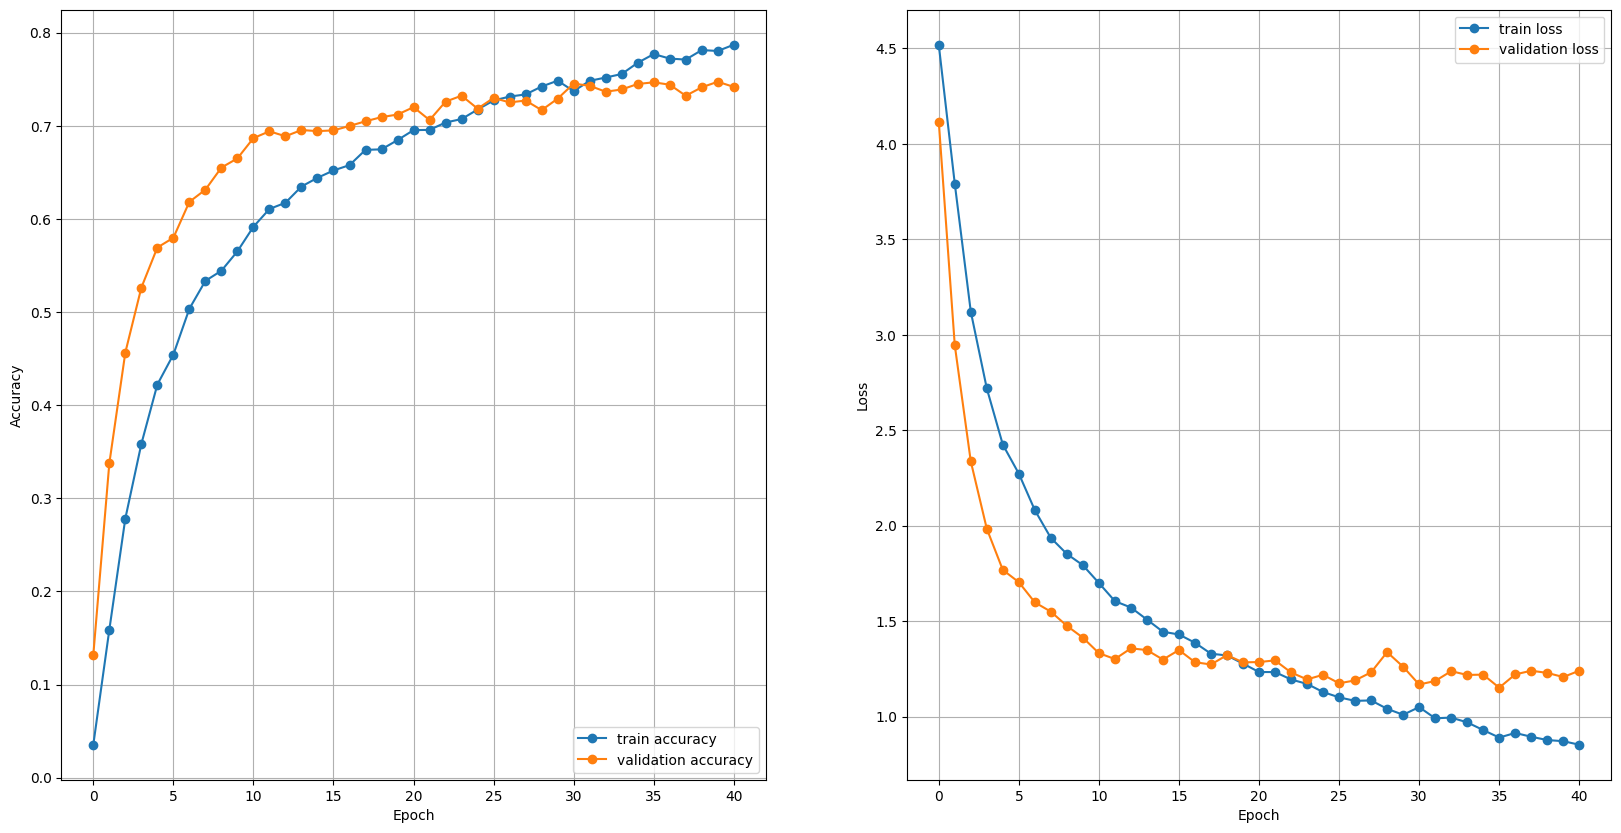

In [10]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()